# National Aerospace University «Kharkiv Aviation Institute». Dept. 504

## Image compression & Visual quality metrics (Colab CPU-version). Grayscale images


### Python packets install

In [51]:
!pip install Pillow
!pip install opencv-python
!pip install sewar
!pip install scikit-image

exit
exit


#### CPU info

In [52]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

#### Memory info

In [53]:
!cat /proc/meminfo

MemTotal:       13302920 kB
MemFree:         8833500 kB
MemAvailable:   12395284 kB
Buffers:          225152 kB
Cached:          3358048 kB
SwapCached:            0 kB
Active:          1249184 kB
Inactive:        2870972 kB
Active(anon):     471124 kB
Inactive(anon):      456 kB
Active(file):     778060 kB
Inactive(file):  2870516 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               464 kB
Writeback:             0 kB
AnonPages:        537076 kB
Mapped:           304436 kB
Shmem:              1184 kB
KReclaimable:     239156 kB
Slab:             283968 kB
SReclaimable:     239156 kB
SUnreclaim:        44812 kB
KernelStack:        5936 kB
PageTables:         7700 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3849556 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8420 kB
VmallocChunk:          0 kB
Percpu:          

#### Linux version

In [54]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [55]:
!uname -m

x86_64


### Python packets load

In [56]:
# Global packets
import numpy as np 
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import sewar
import cv2
import os
import PIL
from sklearn.metrics import mean_squared_error
import subprocess
from tqdm.notebook import tqdm

%matplotlib inline

In [57]:
gd_flag = False

### *** Change path to your path in Google drive ***

In [58]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/My Drive/XAI')  # Change to your path
sys.path.append('/content/drive/My Drive/XAI/BPG')  # Change to your path
gd_flag = True

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [59]:
if gd_flag:
    path_to_root_folder = '/content/drive/My Drive/XAI/'  # Change to your pathes in Google drive    
else:  
    path_to_root_folder = 'd:\\Krivenko\\XAI\\Work\\Images\\BMP\\'  # Path at local PC

## Install Wine (for Windows executable). Not NECESSARY for BPG and JPEG coders!

useful link: https://www.akuh.net/2021/06/lifetime-google-colaboratory.html

### Enter these commands after you run !sudo su  (each time copy-paste to #content field then press Enter)


1.   apt install wine-stable 
2.   dpkg --add-architecture i386 && apt-get update && apt-get install wine32 
3.   exit

In [60]:
!sudo su

bash: cannot set terminal process group (60): Inappropriate ioctl for device
bash: no job control in this shell
/content# apt install wine-stable
Reading package lists... Done
Building dependency tree       
Reading state information... Done
wine-stable is already the newest version (3.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
32
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u

### Just for checking (temp.raw has to be created)

In [ ]:
#!wine /content/drive/MyDrive/XAI/Coders/AGU.exe e /content/drive/MyDrive/XAI/temp.raw /content/drive/MyDrive/XAI/temp.cod 8

#### You have to see something like that: **** DCT 32x32 .... Encoding .......... File Size=59693 bpp=1.8217

#### Allow Linux executables (check your path !!!)

In [11]:
!chmod +x /content/drive/MyDrive/XAI/Coders/bpgenc
!chmod +x /content/drive/MyDrive/XAI/Coders/bpgdec

### Helper functions: psnrhvsm, get_compressed_image_II, get_metrics

#### psnrhvsm

In [12]:
# -------------------------------- [ psnrhvsm ] -------------------------------- #
def psnrhvsm_8x8(imageArray1, imageArray2):
    """
    Calculation of PSNR-HVS-M and PSNR-HVS image quality measures in 8x8 block
    """
    container1 = np.zeros((9, 9), dtype=int)
    container2 = np.zeros((9, 9), dtype=int)
    container1[:8,:8] = imageArray1
    container2[:8,:8] = imageArray2
    p_hvs_m, p_hvs, mse_hvs_m, mse_hvs = psnrhvsm(container1, container2)
    return p_hvs_m, p_hvs, mse_hvs_m, mse_hvs
# -------------------------------- [ psnrhvsm ] -------------------------------- #
def psnrhvsm(imageArray1, imageArray2, wstep = 8):
    """
        Calculation of PSNR-HVS-M and PSNR-HVS image quality measures

        It's a direct implemenation of psnrhvsm.m

        PSNR-HVS-M is Peak Signal to Noise Ratio taking into account
        Contrast Sensitivity Function (CSF) and between-coefficient
        contrast masking of DCT basis functions
        PSNR-HVS is Peak Signal to Noise Ratio taking into account only CSF

        Copyright(c) 2006 Nikolay Ponomarenko

        Python version by Sergey S. Krivenko
        2018/08/27

        Usage:
        import cv2
        import psnrhvsm as p
        imageArray1 = cv2.imread((FileName1), 0)
        imageArray2 = cv2.imread((FileName2), 0)
        psnrhvsm, psnrhvs, mse_hvs_m, mse_hvs = p.psnrhvsm(imageArray1, imageArray2)
    """

    if imageArray1.shape[0] != imageArray2.shape[0] or imageArray1.shape[1] != imageArray2.shape[1]:
        raise ValueError('Images\' dimensions are not equal')
    else:
        LenXY = imageArray1.shape
        LenX = imageArray1.shape[0]
        LenY = imageArray1.shape[1]

    CSFCof = np.array([[1.608443, 2.339554, 2.573509, 1.608443, 1.072295, 0.643377, 0.504610, 0.421887],
            [2.144591, 2.144591, 1.838221, 1.354478, 0.989811, 0.443708, 0.428918, 0.467911],
            [1.838221, 1.979622, 1.608443, 1.072295, 0.643377, 0.451493, 0.372972, 0.459555],
            [1.838221, 1.513829, 1.169777, 0.887417, 0.504610, 0.295806, 0.321689, 0.415082],
            [1.429727, 1.169777, 0.695543, 0.459555, 0.378457, 0.236102, 0.249855, 0.334222],
            [1.072295, 0.735288, 0.467911, 0.402111, 0.317717, 0.247453, 0.227744, 0.279729],
            [0.525206, 0.402111, 0.329937, 0.295806, 0.249855, 0.212687, 0.214459, 0.254803],
            [0.357432, 0.279729, 0.270896, 0.262603, 0.229778, 0.257351, 0.249855, 0.259950]])

    MaskCof = np.array([[0.390625, 0.826446, 1.000000, 0.390625, 0.173611, 0.062500, 0.038447, 0.026874],
            [0.694444, 0.694444, 0.510204, 0.277008, 0.147929, 0.029727, 0.027778, 0.033058],
            [0.510204, 0.591716, 0.390625, 0.173611, 0.062500, 0.030779, 0.021004, 0.031888],
            [0.510204, 0.346021, 0.206612, 0.118906, 0.038447, 0.013212, 0.015625, 0.026015],
            [0.308642, 0.206612, 0.073046, 0.031888, 0.021626, 0.008417, 0.009426, 0.016866],
            [0.173611, 0.081633, 0.033058, 0.024414, 0.015242, 0.009246, 0.007831, 0.011815],
            [0.041649, 0.024414, 0.016437, 0.013212, 0.009426, 0.006830, 0.006944, 0.009803],
            [0.019290, 0.011815, 0.011080, 0.010412, 0.007972, 0.010000, 0.009426, 0.010203]])

    step = wstep
    S1 = 0
    S2 = 0
    Num = 0
    X = 0
    Y = 0
    img1 = imageArray1
    img2 = imageArray2
    whileConst = 8

    while Y < LenY - whileConst:
        while X < LenX - whileConst:
            A = np.float64(img1[Y:Y + whileConst, X: X + whileConst])
            B = np.float64(img2[Y:Y + whileConst, X: X + whileConst])
            A_dct = cv2.dct(np.float64(A))
            B_dct = cv2.dct(np.float64(B))
            MaskA = maskeff_optimize(A, A_dct)
            MaskB = maskeff_optimize(B, B_dct)
            if MaskB > MaskA:
                MaskA = MaskB
            X = X + step
            for k in range(8):
                for l in range(8):
                    u = abs(A_dct[k, l] - B_dct[k, l])
                    S2 = S2 + pow(u * CSFCof[k, l], 2)  # PSNR - HVS
                    if k != 0 or l != 0:
                        if u < MaskA / MaskCof[k, l]:
                            u = 0
                        else:
                            u = u - MaskA / MaskCof[k, l]
                    S1 = S1 + pow(u * CSFCof[k, l], 2)  # PSNR - HVS - M
                    Num = Num + 1
        X = 1
        Y = Y + step

    if Num != 0:
        S1 = S1 / Num
        S2 = S2 / Num
        if S1 == 0:
            p_hvs_m = 100000
        else:
            p_hvs_m = 10 * np.log10(255 * 255 / S1)
        if S2 == 0:
            p_hvs = 100000
        else:
            p_hvs = 10 * np.log10(255 * 255 / S2)

    mse_hvs_m = S1
    mse_hvs = S2

    return p_hvs_m, p_hvs, mse_hvs_m, mse_hvs
# -------------------------------- [ psnrhvsm ] -------------------------------- #

# -------------------------------- [ maskeff ] -------------------------------- #
def maskeff(z, zdct):
    """
        Calculation of Enorm value
    """
    MaskCof = np.array([[0.390625, 0.826446, 1.000000, 0.390625, 0.173611, 0.062500, 0.038447, 0.026874],
    [0.694444, 0.694444, 0.510204, 0.277008, 0.147929, 0.029727, 0.027778, 0.033058],
    [0.510204, 0.591716, 0.390625, 0.173611, 0.062500, 0.030779, 0.021004, 0.031888],
    [0.510204, 0.346021, 0.206612, 0.118906, 0.038447, 0.013212, 0.015625, 0.026015],
    [0.308642, 0.206612, 0.073046, 0.031888, 0.021626, 0.008417, 0.009426, 0.016866],
    [0.173611, 0.081633, 0.033058, 0.024414, 0.015242, 0.009246, 0.007831, 0.011815],
    [0.041649, 0.024414, 0.016437, 0.013212, 0.009426, 0.006830, 0.006944, 0.009803],
    [0.019290, 0.011815, 0.011080, 0.010412, 0.007972, 0.010000, 0.009426, 0.010203]])
    m = 0
    for k in range(8):
        for l in range(8):
            if k != 0 or l != 0:
                m = m + pow(zdct[k, l], 2) * MaskCof[k, l]

    pop = vari(z)
    if pop != 0:
        pop = (vari(z[0:4, 0:4])+vari(z[0:4, 4:8])+vari(z[4:8, 4:8])+vari(z[4:8, 0:4])) / pop
    m = np.sqrt(m * pop) / 32
    return m
# -------------------------------- [ maskeff ] -------------------------------- #

# -------------------------------- [ maskeff_optimize ] -------------------------------- #
def maskeff_optimize(z, zdct):
    """
        Calculation of Enorm value, speed 2x optimize version
    """
    MaskCof = np.array([[0.390625, 0.826446, 1.000000, 0.390625, 0.173611, 0.062500, 0.038447, 0.026874],
    [0.694444, 0.694444, 0.510204, 0.277008, 0.147929, 0.029727, 0.027778, 0.033058],
    [0.510204, 0.591716, 0.390625, 0.173611, 0.062500, 0.030779, 0.021004, 0.031888],
    [0.510204, 0.346021, 0.206612, 0.118906, 0.038447, 0.013212, 0.015625, 0.026015],
    [0.308642, 0.206612, 0.073046, 0.031888, 0.021626, 0.008417, 0.009426, 0.016866],
    [0.173611, 0.081633, 0.033058, 0.024414, 0.015242, 0.009246, 0.007831, 0.011815],
    [0.041649, 0.024414, 0.016437, 0.013212, 0.009426, 0.006830, 0.006944, 0.009803],
    [0.019290, 0.011815, 0.011080, 0.010412, 0.007972, 0.010000, 0.009426, 0.010203]])

    m = np.sum(pow(zdct, 2) * MaskCof) - pow(zdct[0, 0], 2) * MaskCof[0, 0]
    pop = vari(z)
    if pop != 0:
        pop = (vari(z[0:4, 0:4])+vari(z[0:4, 4:8])+vari(z[4:8, 4:8])+vari(z[4:8, 0:4])) / pop
    m = np.sqrt(m * pop) / 32
    return m
# -------------------------------- [ maskeff_optimize ] -------------------------------- #

# -------------------------------- [ vari ] -------------------------------- #
def vari(AA):
    """

    """
    return np.var(AA, ddof=1)*AA.shape[0]*AA.shape[1]
# -------------------------------- [ vari ] -------------------------------- #

#### get_compressed_image_II

In [13]:
def get_compressed_image_II(path_to_root_folder, image_name, coder, compression_parameter):
    """
    Compress image

    Args:
        path_to_root_folder: full path to root project folder
        image_name: image filename
        coder: required coder name (AGU, ADCT, AGUm, ADTCm, JPEG2000, BPG)
        compression_parameter: compression parameter

    Returns:
        imageArray: source image (2D numpy array)
        cimageArray: decompressed image (2D numpy array)
        cr: compression ratio
    """    
    tempImagename = "temp"
    rawExt = ".raw"
    coderExt = ".cod"
    outExt = ".out"
    pngExt = ".png"
    space = " "
    pscheme_raw = "lastps.raw"
    
    path_to_image = os.path.join(os.path.join(path_to_root_folder, 'Images'), image_name).replace(" ", "")
    path_to_raw_file = os.path.join(path_to_root_folder, str(tempImagename) + rawExt).replace(" ", "")
    path_to_raw_png = os.path.join(path_to_root_folder, str(tempImagename) + pngExt).replace(" ", "")
    path_to_cod_file = os.path.join(path_to_root_folder, str(tempImagename) + coderExt).replace(" ", "")
    path_to_out_file = os.path.join(path_to_root_folder, str(tempImagename) + outExt).replace(" ", "")
   
    imageArray = cv2.imread((path_to_image), 0)
    bmp2raw(imageArray, path_to_raw_file)

    if coder == 'AGU':  # workable
        path_to_coder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'AGU.exe').replace(" ", "")
        path_to_decoder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'AGU.exe').replace(" ", "")
      
        # compressing
        argsLine = ['wine', path_to_coder, 'e', path_to_raw_file, path_to_cod_file, str(compression_parameter)]
        subprocess.check_call(argsLine)

        # decompressing
        argsLine = ['wine', path_to_decoder, 'd', path_to_cod_file, path_to_out_file]
        subprocess.check_call(argsLine)

        # raw -> image array
        cimageArray = raw2bmp(path_to_out_file)
        #plot_numpy2D(cimageArray, pedestal=0)
        #cv2.imwrite('temp.png', cimageArray, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        os.remove(path_to_out_file)

    if coder == 'AGUm':  # workable
        path_to_coder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'AGUm.exe').replace(" ", "")
        path_to_decoder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'AGUm.exe').replace(" ", "")
      
        # compressing
        argsLine = ['wine', path_to_coder, 'e', path_to_raw_file, path_to_cod_file, str(compression_parameter)]
        subprocess.check_call(argsLine)

        # decompressing
        argsLine = ['wine', path_to_decoder, 'd', path_to_cod_file, path_to_out_file]
        subprocess.check_call(argsLine)

        # raw -> image array
        cimageArray = raw2bmp(path_to_out_file)
        #plot_numpy2D(cimageArray, pedestal=0)
        #cv2.imwrite('temp.png', cimageArray, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        os.remove(path_to_out_file)

    if coder == 'ADCT':  # workable
        path_to_coder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'ADCT.exe').replace(" ", "")
        path_to_decoder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'ADCT.exe').replace(" ", "")
      
        # compressing
        argsLine = ['wine', path_to_coder, 'e', path_to_raw_file, path_to_cod_file, str(compression_parameter)]
        subprocess.check_call(argsLine)

        # decompressing
        argsLine = ['wine', path_to_decoder, 'd', path_to_cod_file, path_to_out_file]
        subprocess.check_call(argsLine)

        # raw -> image array
        cimageArray = raw2bmp(path_to_out_file)
        #plot_numpy2D(cimageArray, pedestal=0)
        #cv2.imwrite('temp.png', cimageArray, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        os.remove(path_to_out_file)

    if coder == 'ADCTm':  # workable
        path_to_coder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'ADCTm.exe').replace(" ", "")
        path_to_decoder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'ADCTm.exe').replace(" ", "")
      
        # compressing
        argsLine = ['wine', path_to_coder, 'e', path_to_raw_file, path_to_cod_file, str(compression_parameter)]        
        subprocess.check_call(argsLine)

        # decompressing
        argsLine = ['wine', path_to_decoder, 'd', path_to_cod_file, path_to_out_file]
        subprocess.check_call(argsLine)

        # raw -> image array
        cimageArray = raw2bmp(path_to_out_file)
        #plot_numpy2D(cimageArray, pedestal=0)
        #cv2.imwrite('temp.png', cimageArray, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        os.remove(path_to_out_file)

    if coder == 'BPG':  # workable
        outExt = ".png"
        path_to_out_file = os.path.join(path_to_root_folder, str(tempImagename) + outExt).replace(" ", "")

        path_to_coder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), './bpgenc').replace(" ", "")        
        path_to_decoder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), './bpgdec').replace(" ", "")

        cv2.imwrite(path_to_raw_png, imageArray, [cv2.IMWRITE_PNG_COMPRESSION, 0])
      
        # compressing
        argsLine = [path_to_coder, '-m', '9', '-b', '8', '-q', str(compression_parameter), path_to_raw_png, '-o', path_to_cod_file]
        subprocess.check_call(argsLine)        
        os.remove(path_to_raw_png)       

        # decompressing
        argsLine = [path_to_decoder, '-o', path_to_out_file, path_to_cod_file]        
        subprocess.check_call(argsLine)

        # raw -> image array
        cimageArray = cv2.imread(path_to_out_file, 0)
        os.remove(path_to_out_file)

    if coder == 'JPEG2000':  # workable
        coderExt = ".j2k"
        outExt = ".png"
        path_to_cod_file = os.path.join(path_to_root_folder, str(tempImagename) + coderExt).replace(" ", "")
        path_to_out_file = os.path.join(path_to_root_folder, str(tempImagename) + outExt).replace(" ", "")

        path_to_coder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'opj_compress.exe').replace(" ", "")
        path_to_decoder = os.path.join(os.path.join(path_to_root_folder, 'Coders'), 'opj_decompress.exe').replace(" ", "")

        cv2.imwrite(path_to_raw_png, imageArray, [cv2.IMWRITE_PNG_COMPRESSION, 0])        

        # compressing
        argsLine = ['wine', path_to_coder, '-i', path_to_raw_png, '-o', path_to_cod_file, '-r', str(compression_parameter)]
        subprocess.check_call(argsLine)
        os.remove(path_to_raw_png)

        # decompressing
        argsLine = ['wine', path_to_decoder, '-i', path_to_cod_file, '-o', path_to_out_file]        
        subprocess.check_call(argsLine)

        # raw -> image array
        cimageArray = cv2.imread(path_to_out_file, 0)
        os.remove(path_to_out_file)

    if coder == 'JPEG':  # workable
        coderExt = ".jpg"
        path_to_cod_file = os.path.join(path_to_root_folder, str(tempImagename) + coderExt).replace(" ", "")
        cv2.imwrite(path_to_cod_file, imageArray, [int(cv2.IMWRITE_JPEG_QUALITY), compression_parameter])
        cimageArray = cv2.imread(path_to_cod_file, 0)
        
    # check sizes
    sourceSize = os.path.getsize(path_to_raw_file)
    compressSize = os.path.getsize(path_to_cod_file)
    cr = sourceSize / compressSize

    # Delete temporary files
    os.remove(path_to_raw_file)
    os.remove(path_to_cod_file)

    return imageArray, cimageArray, cr
# -------------------------------- [ ] -------------------------------- #

#### get_metrics

In [14]:
# -------------------------------- [ luma ] -------------------------------- #
def luma(image):
    """
    Convert color to grayscale
    """
    return (0.299 * image[:, :, 2] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 0]).astype(np.uint8)

# -------------------------------- [ get_metrics ] -------------------------------- #
def get_metrics(image_name, coder, source_image, decompressed_image, cr, compression_parameter, original_image):
    """
    Calc metrics

    Args:
        image_name: name of image
        coder: required coder name (AGU, ADCT, AGUm, ADTCm, JPEG2000, BPG)
        source_image: 2D numpy array of source image
        decompressed_image: 2D numpy array of decompressed image
        cr: compression ratio
        compression_parameter: compression parameter(bpp, QS etc.)

    Returns:
        df: dataframe with metrics

    """    
    df = pd.DataFrame()
    #df = pd.DataFrame(columns=['image', 'coder','mse','psnr','mse_hvs','psnrhvs',
    #                            'mse_hvs_m','psnrhvsm', 'compression_ratio', 'msssim', 'compression_parameter'])

    # calc metrics
    psnrhvsm_, psnrhvs_, mse_hvs_m, mse_hvs = psnrhvsm(source_image, decompressed_image)
    mse = mean_squared_error(np.float32(source_image), np.float32(decompressed_image))
    #psnr = 10 * np.log10(255 * 255 / mse)
    msssim = np.abs(sewar.full_ref.msssim(source_image, decompressed_image))
    psnr = cv2.PSNR(source_image, decompressed_image)  # convert images to luma for color images before using!!!

    df.loc[0, 'image'] = image_name
    df.loc[0, 'coder'] = coder
    df.loc[0, 'mse'] = mse
    df.loc[0, 'psnr'] = psnr
    #df.loc[0, 'psnr_cv'] = psnr_cv
    df.loc[0, 'mse_hvs'] = mse_hvs
    df.loc[0, 'psnrhvs'] = psnrhvs_
    df.loc[0, 'mse_hvs_m'] = mse_hvs_m
    df.loc[0, 'psnrhvsm'] = psnrhvsm_
    df.loc[0, 'compression_ratio'] = cr
    df.loc[0, 'msssim'] = msssim
    df.loc[0, 'compression_parameter'] = compression_parameter
    df.loc[0, 'original'] = original_image
    return df
# -------------------------------- [ ] -------------------------------- #  

def bmp2raw(imageArray, rawFilename):
    N, M = np.shape(imageArray)
    rawArray = np.reshape(imageArray, (N * M, 1), order = 'C')
    rawArray.tofile(rawFilename)
    
def raw2bmp(rawFilename):
    dt = np.dtype(np.uint8)
    imageArray = np.fromfile(rawFilename, dtype = dt)
    Nbig = np.shape(imageArray)[0]
    N = int(np.sqrt(Nbig))
    imageArray = np.reshape(imageArray, (N, N), order = 'C')
    return imageArray

#### plotting

In [15]:
def plot_numpy2D(inarray, pedestal=127):
    """
    Show binary image

    Args:        
        inarray: 2D array
        pedestal: pedestal for visual acceptance

    Returns:

    """        
    figure(figsize=(8, 6), dpi=100)
    plt.imshow(inarray + pedestal, cmap='gray')
    plt.axis('off')
    plt.show()

In [16]:
def plot_scatter_1csv(csv1_name, Xname, Yname, image_name):
    """
    Plot scatters

    Args:        
        csv1_name: full path to CSV
        Xname: X axis parameter name according to name in DataFrame
        Yname: Y axis parameter name according to name in DataFrame
        image_name: name of image

    Returns:

    """
    matplotlib.rcParams.update({'font.size': 19})
    df1 = pd.read_csv(csv1_name)
    df1 = df1[(df1['image']==image_name)]
    
    #df1_agu = df1[(df1['coder']=='AGU') & (df1['compression_ratio']<6)]
    #df1_bpg = df1[(df1['coder']=='BPG') & (df1['compression_ratio']<6)]
    #df1_j2k = df1[(df1['coder']=='JPEG2000') & (df1['compression_ratio']>1)]

    df1_agu = df1[(df1['coder']=='AGU')]
    df1_bpg = df1[(df1['coder']=='BPG')]
    df1_j2k = df1[(df1['coder']=='JPEG2000')]
    
    #plt.scatter(df['CR'], df[metric], c="r", alpha=0.7, marker='x')
    plt.plot(df1_agu[Xname], df1_agu[Yname], c="r", marker='x')
    plt.plot(df1_bpg[Xname], df1_bpg[Yname], c="g", marker='x')
    plt.plot(df1_j2k[Xname], df1_j2k[Yname], c="b", marker='x')

    plt.xlabel(Xname)
    plt.ylabel(Yname)
    #plt.legend(loc='best', fontsize='large')
    plt.legend(loc='best', fontsize='small', labels=['AGU', 'BPG', 'JPEG2000'])
    #plt.interactive(True)
    plt.title('{0} = f({1}), {2}'.format(Yname, Xname, df1.loc[0, 'image']))
    plt.grid()
    #plt.savefig('wwwwww')
    plt.show()

## Main sheet

### Single step

In [64]:
coder = 'AGU'  # BPG, AGU, ADCT, AGUm, ADCTm, JPEG, JPEG2000
compression_parameter = 20  # QS, Q etc.
noise_std = 0  # noise StD, uint8
image_name = 'goldhill.bmp'

In [65]:
imageArray, cimageArray, cr = get_compressed_image_II(path_to_root_folder, image_name, coder, compression_parameter)

In [66]:
local_df = get_metrics(image_name, coder, imageArray, cimageArray, cr, compression_parameter, original_image=False)
local_df.head()

,image,coder,mse,psnr,mse_hvs,psnrhvs,mse_hvs_m,psnrhvsm,compression_ratio,msssim,compression_parameter,original
0,goldhill.bmp,AGU,17.675323,35.65713,23.958057,34.336288,8.295016,38.942631,10.313727,0.988642,20.0,False


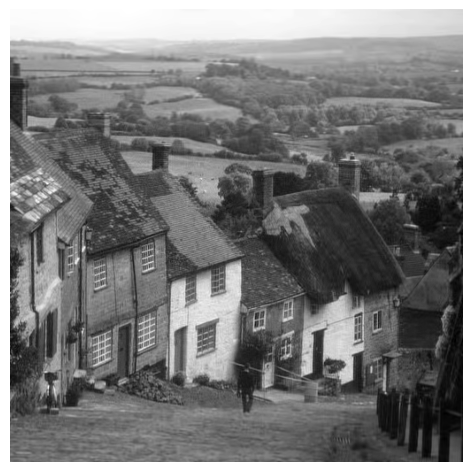

In [67]:
plot_numpy2D(cimageArray, pedestal=0)

### Loop

In [68]:
coders = ['AGU', 'BPG', 'JPEG2000']  # BPG, AGU, ADCT, AGUm, ADCTm, JPEG, JPEG2000
compression_parameters = np.arange(30, 35, 1)  # QS, Q etc.
noise_std = 0  # noise StD, uint8
path_to_images = os.path.join(path_to_root_folder, 'Images').replace(" ", "")
filenames = [ f for f in os.listdir(path_to_images) if os.path.isfile(os.path.join(path_to_images, f))]
print(filenames)

['goldhill.bmp', 'lenna.bmp']


In [ ]:
df = None
for coder in coders:
  for filename in filenames:
    print(f'Coder: {coder}, image: {filename}')
    for compression_parameter in tqdm(compression_parameters):
      imageArray, cimageArray, cr = get_compressed_image_II(path_to_root_folder, filename, coder, compression_parameter)      
      local_df = get_metrics(filename, coder, imageArray, cimageArray, cr, compression_parameter, original_image=False)
      if df is None:
        df = local_df
      else:
        df = df.append(local_df, ignore_index = True)

# save results to CSV and XLS (folder Results)
df.to_csv(os.path.join(os.path.join(path_to_root_folder, 'Results'), 'result.csv').replace(" ", ""), index=False)
df.to_excel(os.path.join(os.path.join(path_to_root_folder, 'Results'), 'result.xlsx').replace(" ", ""), sheet_name=','.join(coders))

Coder: AGU, image: goldhill.bmp


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df.head()

,image,coder,mse,psnr,psnr_cv,mse_hvs,psnrhvs,mse_hvs_m,psnrhvsm,compression_ratio,msssim,compression_parameter,original
0,goldhill.bmp,AGU,29.278191,33.465361,33.465361,45.734465,31.528368,20.120900,35.094330,16.747205,0.979768,30.0,False
1,goldhill.bmp,AGU,30.347450,33.309582,33.309582,47.840805,31.332819,21.322809,34.842360,17.468115,0.978877,31.0,False
2,goldhill.bmp,AGU,31.497089,33.148099,33.148099,50.429927,31.103920,22.886187,34.535069,18.165339,0.978042,32.0,False
3,goldhill.bmp,AGU,32.502209,33.011675,33.011675,52.629832,30.918484,24.220484,34.288975,18.833537,0.977229,33.0,False
4,goldhill.bmp,AGU,33.634663,32.862933,32.862933,55.075754,30.721199,25.696995,34.031980,19.560066,0.976209,34.0,False


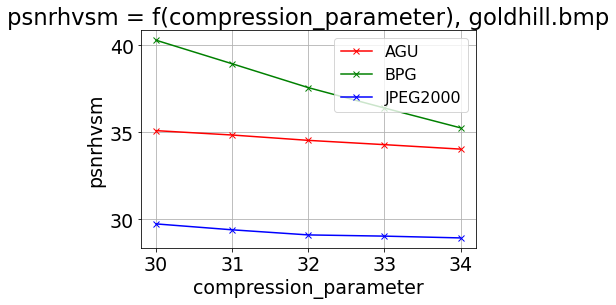

In [ ]:
plot_scatter_1csv(os.path.join(os.path.join(path_to_root_folder, 'Results'), 'result.csv').replace(" ", ""), 'compression_parameter', 'psnrhvsm', 'goldhill.bmp')